In [2]:
import pandas as pd
print(pd.__version__)

2.3.3


# Sales Performance Analysis

This project analyzes sales data to identify trends,top-performing regions,and product categories using Python and Pandas.

In [3]:
import pandas as pd

# Load dataset
df = pd.read_excel("../data/Sample Superstore Practice.xlsx", engine="openpyxl")

# Preview data
df.head()

,Order ID,Order Date,Ship Date,Unnamed: 3,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,CA-2016-152156,2016-08-11 00:00:00,2016-11-11 00:00:00,NaN,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,CA-2016-152156,2016-08-11 00:00:00,2016-11-11 00:00:00,NaN,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,CA-2016-138688,2016-12-06 00:00:00,6/16/2016,NaN,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,US-2015-108966,2015-11-10 00:00:00,10/18/2015,NaN,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,US-2015-108966,2015-11-10 00:00:00,10/18/2015,NaN,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [4]:
# Basic info
df.info()
# Column names
df.columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Order ID       9994 non-null   object 
 1   Order Date     9994 non-null   object 
 2   Ship Date      9994 non-null   object 
 3   Unnamed: 3     0 non-null      float64
 4   Ship Mode      9994 non-null   object 
 5   Customer ID    9994 non-null   object 
 6   Customer Name  9994 non-null   object 
 7   Segment        9994 non-null   object 
 8   Country        9994 non-null   object 
 9   City           9994 non-null   object 
 10  State          9994 non-null   object 
 11  Postal Code    9994 non-null   int64  
 12  Region         9994 non-null   object 
 13  Product ID     9994 non-null   object 
 14  Category       9994 non-null   object 
 15  Sub-Category   9994 non-null   object 
 16  Product Name   9994 non-null   object 
 17  Sales          9994 non-null   float64
 18  Quantity

Index(['Order ID', 'Order Date', 'Ship Date', 'Unnamed: 3', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales', 'Quantity', 'Discount', 'Profit'],
      dtype='object')

In [5]:
# Total sales by category
sales_by_category = df.groupby("Category")["Sales"].sum().sort_values(ascending=False)
sales_by_category

Category
Technology         836154.0330
Furniture          741999.7953
Office Supplies    719047.0320
Name: Sales, dtype: float64

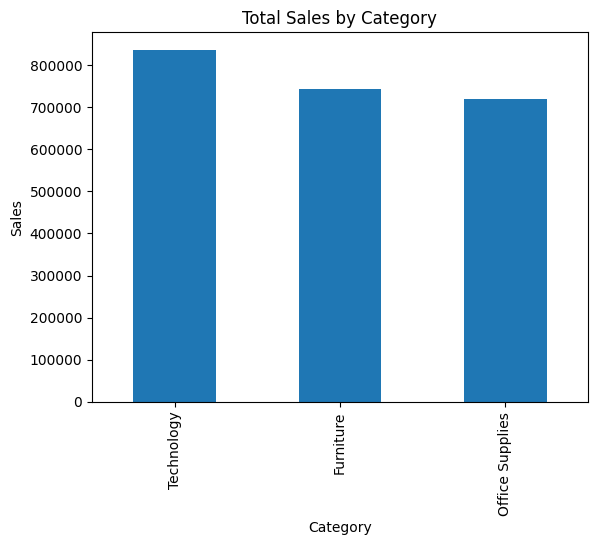

In [6]:
import matplotlib.pyplot as plt

sales_by_category.plot(kind="bar")
plt.title("Total Sales by Category")
plt.ylabel("Sales")
plt.xlabel("Category")
plt.show()

## Key Insight
-Technology products generated the highest total sales of 836154.0330.

-Furniture products generated total sales of 741999.7953

-Office supplies had the lowest overall contribution with total sales of 719047.0320

In [7]:
df.columns

Index(['Order ID', 'Order Date', 'Ship Date', 'Unnamed: 3', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales', 'Quantity', 'Discount', 'Profit'],
      dtype='object')

In [8]:
# Drop unnamed column
df = df.drop(columns=["Unnamed: 3"])

df.columns

Index(['Order ID', 'Order Date', 'Ship Date', 'Ship Mode', 'Customer ID',
       'Customer Name', 'Segment', 'Country', 'City', 'State', 'Postal Code',
       'Region', 'Product ID', 'Category', 'Sub-Category', 'Product Name',
       'Sales', 'Quantity', 'Discount', 'Profit'],
      dtype='object')

In [9]:
import pandas as pd
import matplotlib.pyplot as plt

# Convert Order Date to datetime
df["Order Date"] = pd.to_datetime(df["Order Date"])

# Create Year-Month column
df["Year-Month"] = df["Order Date"].dt.to_period("M")

# Calculate monthly sales
monthly_sales = df.groupby("Year-Month")["Sales"].sum()

monthly_sales.head()

Year-Month
2014-01    28953.706
2014-02    12743.108
2014-03    54801.906
2014-04    24710.016
2014-05    29639.834
Freq: M, Name: Sales, dtype: float64

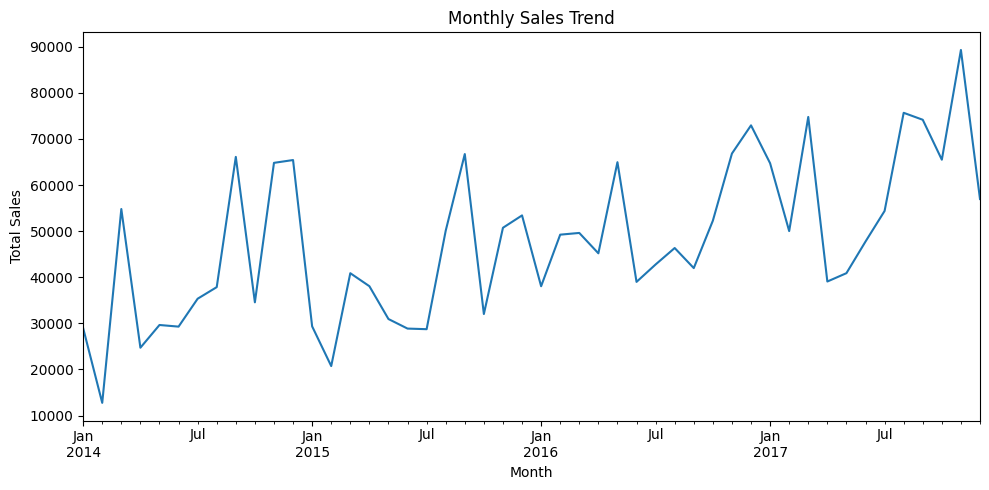

In [10]:
monthly_sales.plot(kind="line", figsize=(10,5))
plt.title("Monthly Sales Trend")
plt.xlabel("Month")
plt.ylabel("Total Sales")
plt.tight_layout()
plt.show()

## Monthly Sales Trend

The chart above shows total sales change over time,revealing periods of higher and lower sales activity that may indicate seasonal patterns.

In [11]:
sales_by_category = (
    df.groupby("Category")["Sales"]
    .sum()
    .sort_values(ascending=False)
)

sales_by_category

Category
Technology         836154.0330
Furniture          741999.7953
Office Supplies    719047.0320
Name: Sales, dtype: float64

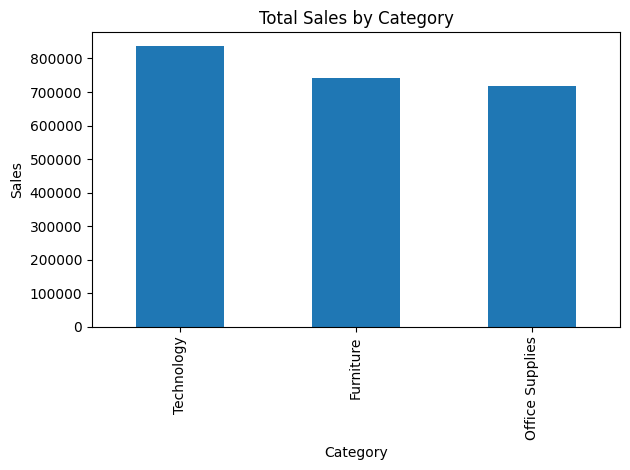

In [12]:
sales_by_category.plot(kind="bar")
plt.title("Total Sales by Category")
plt.ylabel("Sales")
plt.xlabel("Category")
plt.tight_layout()
plt.show()

## Sales by Category

Total sales differ across product categories,highlighting which categories contribute the most to overall revenue.

In [13]:
sales_by_region = (
    df.groupby("Region")["Sales"]
    .sum()
    .sort_values(ascending=False)
)

sales_by_region

Region
West       725457.8245
East       678781.2400
Central    501239.8908
South      391721.9050
Name: Sales, dtype: float64

## Regional Performance
Sales performance veries by region which can help identify geographic areas with stinger customer demand.

In [14]:
top_customers = (
    df.groupby("Customer Name")["Sales"]
    .sum()
    .sort_values(ascending=False)
    .head(10)
)

top_customers

Customer Name
Sean Miller           25043.050
Tamara Chand          19052.218
Raymond Buch          15117.339
Tom Ashbrook          14595.620
Adrian Barton         14473.571
Ken Lonsdale          14175.229
Sanjit Chand          14142.334
Hunter Lopez          12873.298
Sanjit Engle          12209.438
Christopher Conant    12129.072
Name: Sales, dtype: float64

## Top Customers

The top 10 customers contribute a notable share of total sales,suggesting potential opportunites for customer-focused strategies.

In [15]:
profit_by_category = (
    df.groupby("Category")["Profit"]
    .sum()
    .sort_values(ascending=False)
)

profit_by_category 

Category
Technology         145454.9481
Office Supplies    122490.8008
Furniture           18451.2728
Name: Profit, dtype: float64

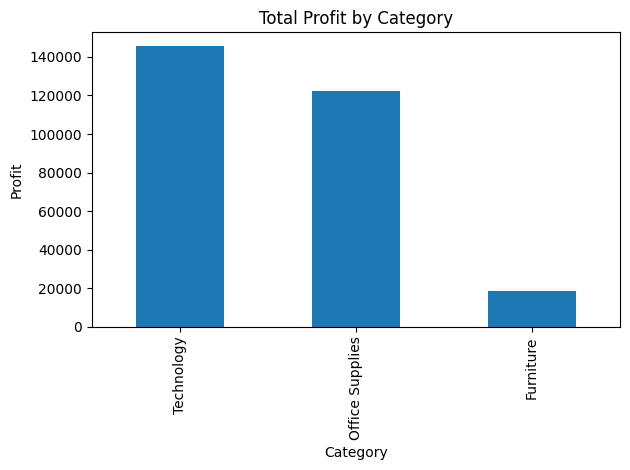

In [16]:
profit_by_category.plot(kind="bar")
plt.title("Total Profit by Category")
plt.ylabel("Profit")
plt.tight_layout()
plt.show()

## Profit by Category

While sales volumne is important,profitability varies by category and provides additional insight into business performance.